#    Artificial Intelligence - Computer Assignment 0  ###

In [483]:
# importing vital libraries
import os
import numpy as np
import pandas as pd
import time
import scipy.stats as ss
import matplotlib.pyplot as plt

In [484]:
# getting to the right path
os.chdir("E:\\University\\Term 6\\AI\\Projects\\Project0")
path = os.getcwd()
print(path)
ls = os. listdir()
print(ls)

E:\University\Term 6\AI\Projects\Project0
['AI-CA0-Spring 1401.pdf', 'bank_term_deposit.csv']


## PART 1

In [485]:
#reading the csv file
df = pd.read_csv('bank_term_deposit.csv')

In [486]:
# describe
df.describe()
# Using this function we can obtain the basic statistical details of our dataframe
# obviously this only includes the columns with numerical values
# note: this function excludes NaN values

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


In [487]:
# tail
df.tail(10)
# Shows the n last rows of the dataframe 
# by giving the integer m as an argument to the functoin you can get the last m rows
# m is set to 5 by default

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4511,46.0,blue-collar,married,secondary,668.0,yes,no,1263.0,2,-1,unknown,yes
4512,40.0,blue-collar,married,secondary,11.0,yes,no,660.0,2,-1,unknown,no
4513,49.0,blue-collar,married,secondary,322.0,no,no,356.0,2,-1,unknown,no
4514,38.0,blue-collar,married,secondary,125.0,yes,no,45.0,4,153,failure,no
4515,32.0,services,single,secondary,473.0,yes,no,624.0,5,-1,unknown,no
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


In [488]:
# head
df.head(20)
# Shows the n first rows of the dataframe 
# by giving the integer m as an argument to the functoin you can get the first m rows
# m is set to 5 by default

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
5,NaN,management,single,tertiary,747.0,NaN,no,141.0,2,176,failure,no
6,36.0,self-employed,married,tertiary,37.0,yes,no,341.0,1,330,other,no
7,39.0,technician,married,secondary,147.0,yes,no,151.0,2,-1,unknown,no
8,41.0,entrepreneur,married,tertiary,221.0,yes,no,57.0,2,-1,unknown,no
9,43.0,services,married,primary,-88.0,yes,yes,313.0,1,147,failure,no


In [489]:
# info
df.info()
# prints a summary of all columns
# including their data type, names, and their non_null counts
# the memory usage is also shown describing the total memory usage of the DataFrame elements including the index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


## PART 2

In [490]:
df.info(verbose=True, null_counts=False, memory_usage=False) 

# the columns with float and int as data type are considered "numerical"
# the columns with object as data type are considered "categorical"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   age        float64
 1   job        object 
 2   marital    object 
 3   education  object 
 4   balance    float64
 5   housing    object 
 6   loan       object 
 7   duration   float64
 8   campaign   int64  
 9   pdays      int64  
 10  poutcome   object 
 11  y          object 
dtypes: float64(3), int64(2), object(7)

In [491]:
# encoding the marital status of people to intergers 0 to 2

codes = {"marital": {"single": 0, "married": 1, "divorced":2}}
df = df.replace(codes)
df.info(verbose=True, null_counts=False, memory_usage=False)

# as shown below, the type of marital column has changed from object to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   age        float64
 1   job        object 
 2   marital    float64
 3   education  object 
 4   balance    float64
 5   housing    object 
 6   loan       object 
 7   duration   float64
 8   campaign   int64  
 9   pdays      int64  
 10  poutcome   object 
 11  y          object 
dtypes: float64(4), int64(2), object(6)

In [492]:
df.head(20)
# here we see that the value of marital status has been successfuly replaced

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,1.0,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,1.0,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,0.0,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,1.0,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,1.0,secondary,NaN,yes,no,226.0,1,-1,unknown,no
5,NaN,management,0.0,tertiary,747.0,NaN,no,141.0,2,176,failure,no
6,36.0,self-employed,1.0,tertiary,37.0,yes,no,341.0,1,330,other,no
7,39.0,technician,1.0,secondary,147.0,yes,no,151.0,2,-1,unknown,no
8,41.0,entrepreneur,1.0,tertiary,221.0,yes,no,57.0,2,-1,unknown,no
9,43.0,services,1.0,primary,-88.0,yes,yes,313.0,1,147,failure,no


## PART 3

In [493]:
# counting the number of NaN values for each column
df.isna().sum()

# the isna() function returns True in place of a NaN value in a cell
# by using sum() after isna() we can calculate all the True's in a column (True = 1, False = 0)

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [494]:
# getting the mean values (mode for categorical columns)
housing_mean = df["housing"].mode()
column_means = df. mean()
column_means["housing"] = housing_mean[0]
column_means

age          41.6175
marital     0.852534
balance      1136.75
duration     264.724
campaign     2.79363
pdays        39.7666
housing          yes
dtype: object

In [495]:
# replacing the NaNs with the mean value of each column
df = df.fillna(column_means)
df.isna().sum()

# as shown below, all the NaN values have been replaced except the ones in the target column

age            0
job            0
marital        0
education      0
balance        0
housing        0
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [496]:
# removing the rows with empty target value

valid_rows = df['y'].isin(['yes', 'no'])
df_NaN = df[~valid_rows]
df = df[valid_rows]
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,1.0,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,1.0,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,0.0,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,1.0,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,1.0,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,1.0,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,1.0,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,1.0,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,1.0,secondary,1137.00000,no,no,129.00000,4,211,other,no


## PART 4

In [497]:
# showing the number of users with loans
loan = df['housing'].isin(['yes'])
print('number of people with housing loans is {}'.format(loan.sum()))

y = df['y'].isin(['yes'])
print('number of people with time deposits (y==yes) is {}'.format(y.sum()))


housing = df['housing'].isin(['yes'])
has_housing = df[housing]
housing_and_longTermDeposit = has_housing['y'].isin(['yes'])
print('the number of people with both housing loan and long term deposit is {}'.format(housing_and_longTermDeposit.sum()))

number of people with housing loans is 2389
number of people with time deposits (y==yes) is 464
the number of people with both housing loan and long term deposit is 209


## PART 5

In [498]:
ageAbove35 = df['age'] > 35
is_above_35 = df[ageAbove35]
single_above_35 = (is_above_35['marital'] == 0)
is_single_above_35 = is_above_35[single_above_35]
output = (is_single_above_35['poutcome'] == 'success')
print('the number of single people above 35 on whom the previous campain was a success is {}'.format(output.sum()))

the number of single people above 35 on whom the previous campain was a success is 14


## PART 6

In [499]:
secondary = df[df['education'] == 'secondary']
print('the mean balance of people with secondary education is {}'.format(secondary['balance'].mean()))

the mean balance of people with secondary education is 950.7017237980879


## PART 7

In [500]:
time0 = time.time()
secondary = df[df['education'] == 'secondary']
result1 = secondary['balance'].mean()
time1 = time.time()

s = 0
num = 0
for i in range(len(df)):
    if df.iloc[i]['education'] == 'secondary':
        num = 1 + num
        s = s + df.iloc[i]['balance']
result2 = s / num
time2 = time.time()

print('first mean = {}'.format(result1))
print('second mean = {}'.format(result2))

print('Vectorization: {}'.format(time1 - time0))
print('Using a loop: {}'.format(time2 - time1))


print('Using a loop takes {} times more time than vectorization!!'.format(int((time2 - time1)/(time1 - time0)) - 1))

first mean = 950.7017237980879
second mean = 950.7017237980879
Vectorization: 0.003998279571533203
Using a loop: 1.6409268379211426
Using a loop takes 409 times more time than vectorization!!


## PART 8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002497B0FABB0>,
      dtype=object)

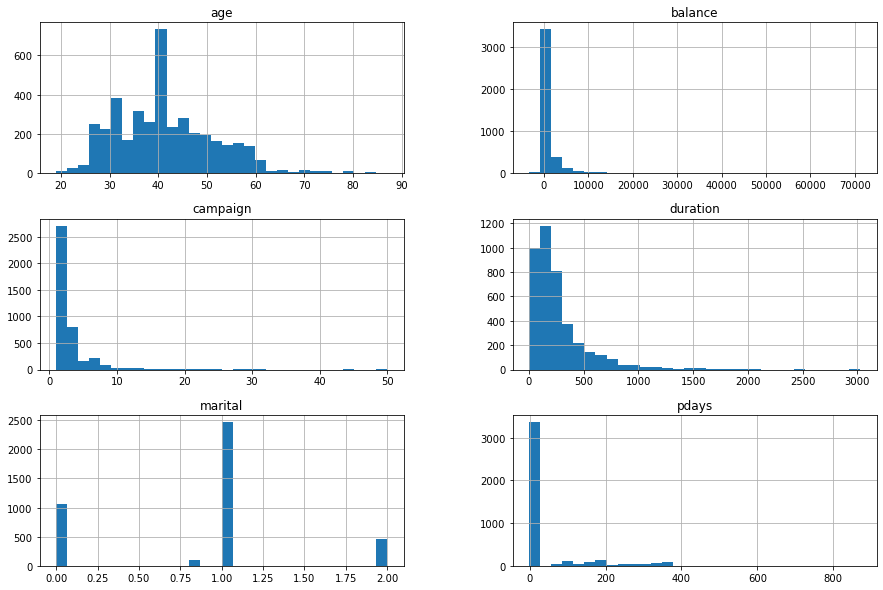

In [501]:
df.hist(bins=30, figsize=(15, 10))

## PART 9

In [502]:
df_new = df.drop(['marital', 'job', 'education', 'housing' ,'loan', 'poutcome', 'y'], axis=1)

In [503]:
print('before normalization: ')
df_new

before normalization: 


,age,balance,duration,campaign,pdays
0,30.00000,1787.00000,79.00000,1,-1
1,33.00000,4789.00000,264.72402,1,339
2,41.61747,135.00000,185.00000,1,330
3,30.00000,1476.00000,199.00000,4,-1
4,59.00000,1136.75024,226.00000,1,-1
...,...,...,...,...,...
4516,33.00000,-333.00000,329.00000,5,-1
4517,57.00000,-3313.00000,153.00000,1,-1
4518,57.00000,295.00000,151.00000,11,-1
4519,28.00000,1137.00000,129.00000,4,211


In [504]:
normalized_df_new = (df_new-df_new.mean())/df_new.std()
print('after normalization:')
normalized_df_new

after normalization:


,age,balance,duration,campaign,pdays
0,-1.154366,0.255388,-0.724620,-0.573012,-0.404051
1,-0.856422,1.406374,-0.005131,-0.573012,3.031432
2,-0.000582,-0.378000,-0.313979,-0.573012,2.940492
3,-1.154366,0.136148,-0.259744,0.380660,-0.404051
4,1.725758,0.006078,-0.155147,-0.573012,-0.404051
...,...,...,...,...,...
4516,-0.856422,-0.557434,0.243872,0.698550,-0.404051
4517,1.527129,-1.699986,-0.437946,-0.573012,-0.404051
4518,1.527129,-0.316655,-0.445694,2.605894,-0.404051
4519,-1.352996,0.006173,-0.530922,0.380660,1.738074


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002497B14B2E0>,
      dtype=object)

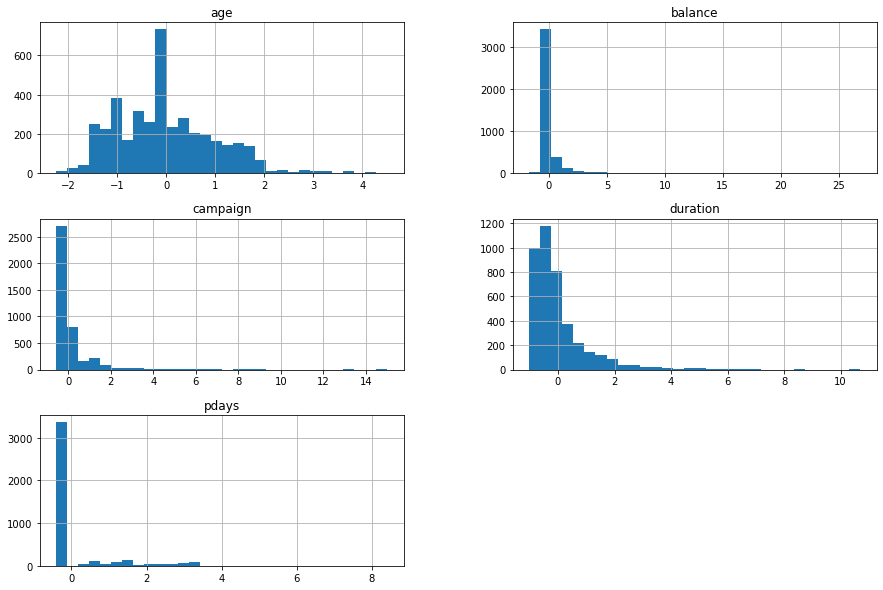

In [505]:
normalized_df_new.hist(bins=30, figsize=(15, 10))

## PART 10

In [506]:
# adding the y column to our normalized data
normalized_df_new['y'] = df['y']
normalized_df_new

,age,balance,duration,campaign,pdays,y
0,-1.154366,0.255388,-0.724620,-0.573012,-0.404051,no
1,-0.856422,1.406374,-0.005131,-0.573012,3.031432,no
2,-0.000582,-0.378000,-0.313979,-0.573012,2.940492,no
3,-1.154366,0.136148,-0.259744,0.380660,-0.404051,no
4,1.725758,0.006078,-0.155147,-0.573012,-0.404051,no
...,...,...,...,...,...,...
4516,-0.856422,-0.557434,0.243872,0.698550,-0.404051,no
4517,1.527129,-1.699986,-0.437946,-0.573012,-0.404051,no
4518,1.527129,-0.316655,-0.445694,2.605894,-0.404051,no
4519,-1.352996,0.006173,-0.530922,0.380660,1.738074,no


In [507]:
withDeposit = normalized_df_new[normalized_df_new['y'] == 'yes']
m_with = withDeposit.mean()
std_with = withDeposit.std()
print('mean and standard deviations for for y==yes:\n')
print('mean:')
print(m_with)
print('\nstandard deviation:')
print(std_with)

withoutDeposit = normalized_df_new[normalized_df_new['y'] == 'no']
m_without = withoutDeposit.mean()
std_without = withoutDeposit.std()
print('\nmean and standard deviations for for y==no:')
print('\nmean:')
print(m_without)
print('\nstandard deviation:')
print(std_without)

mean and standard deviations for for y==yes:

mean:
age         0.127102
balance     0.025358
duration    1.092112
campaign   -0.175649
pdays       0.271569
dtype: float64

standard deviation:
age         1.240150
balance     0.796628
duration    1.476690
campaign    0.656222
pdays       1.199902
dtype: float64

mean and standard deviations for for y==no:

mean:
age        -0.016278
balance    -0.003248
duration   -0.139868
campaign    0.022495
pdays      -0.034780
dtype: float64

standard deviation:
age         0.963936
balance     1.023176
duration    0.822798
campaign    1.033731
pdays       0.966128
dtype: float64




intersection 1 happens at -1.414141414141414
intersection 2 happens at 0.8484848484848486


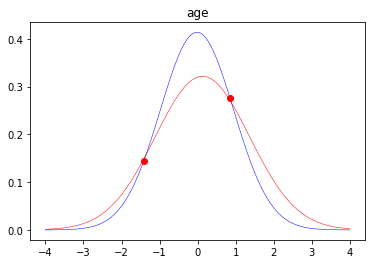



intersection 1 happens at -0.8484848484848482
intersection 2 happens at 0.92929292929293


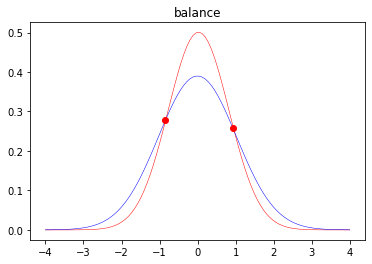



intersection 1 happens at -2.2222222222222223
intersection 2 happens at 0.7676767676767682


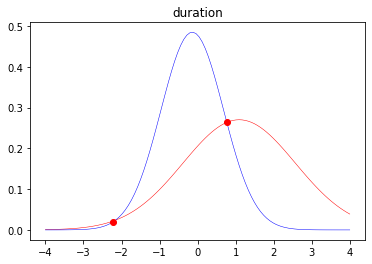



intersection 1 happens at -1.1717171717171713
intersection 2 happens at 0.525252525252526


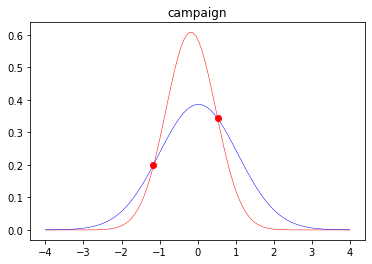



intersection 1 happens at -1.8989898989898988
intersection 2 happens at 0.6060606060606064


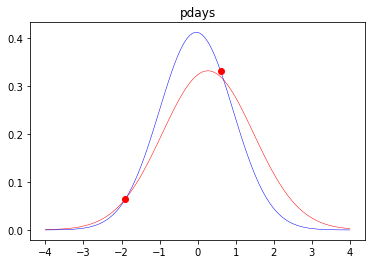

In [508]:
h = list(normalized_df_new.columns)

for i in h:
    if i != 'y':

        x = np.linspace(-4, 4 , 100)        
        n = ss.norm(m_with[i], std_with[i])
        plt.plot(x, n.pdf(x),'r-', lw=0.5)
        
        n2 = ss.norm(m_without[i], std_without[i])
        plt.plot(x, n2.pdf(x),'b-', lw=0.5)
        
        idx = np.argwhere(np.diff(np.sign(n.pdf(x) - n2.pdf(x)))).flatten()
        plt.plot(x[idx], n2.pdf(x[idx]), 'ro')
        
        print('\n\nintersection 1 happens at {}'.format(x[idx][0]))
        print('intersection 2 happens at {}'.format(x[idx][1]))

        plt.title(i)
        plt.show()

## PART 11

In [509]:
# normalizing the duration data with NaN as target value

df_NaN['duration'] = (df_NaN['duration']-df_new['duration'].mean())/df_new['duration'].std()

In [510]:
intersection_point = 0.525252525252526
yes = df_NaN['duration'] > intersection_point
no = df_NaN['duration'] <= intersection_point
df_NaN.loc[yes] = 'yes'
df_NaN.loc[no] = 'no'

In [512]:
df_NaN.to_csv('prediction.txt')